## Credit Card Fraud Detection Analysis

#### Exploratory Data Analysis to understand impact of different features on Fraud Transactions

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading dataset
df1=pd.read_csv("subset_fraudTrain.csv")
df1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [9]:
#Exploring columns and features in the dataset
df1.info()
first_column = df1.columns[0]
df1 = df1.drop([first_column], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             49999 non-null  int64  
 1   trans_date_trans_time  49999 non-null  object 
 2   cc_num                 49999 non-null  float64
 3   merchant               49999 non-null  object 
 4   category               49999 non-null  object 
 5   amt                    49999 non-null  float64
 6   first                  49999 non-null  object 
 7   last                   49999 non-null  object 
 8   gender                 49999 non-null  object 
 9   street                 49999 non-null  object 
 10  city                   49999 non-null  object 
 11  state                  49999 non-null  object 
 12  zip                    49999 non-null  int64  
 13  lat                    49999 non-null  float64
 14  long                   49999 non-null  float64
 15  ci

### Data Cleaning

In [11]:
#Removing duplicate columns
df1.head()
df1.pop('unix_time')

0        1325376018
1        1325376044
2        1325376051
3        1325376076
4        1325376186
            ...    
49994    1327877090
49995    1327877095
49996    1327877158
49997    1327877181
49998    1327877221
Name: unix_time, Length: 49999, dtype: int64

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  49999 non-null  object 
 1   cc_num                 49999 non-null  float64
 2   merchant               49999 non-null  object 
 3   category               49999 non-null  object 
 4   amt                    49999 non-null  float64
 5   first                  49999 non-null  object 
 6   last                   49999 non-null  object 
 7   gender                 49999 non-null  object 
 8   street                 49999 non-null  object 
 9   city                   49999 non-null  object 
 10  state                  49999 non-null  object 
 11  zip                    49999 non-null  int64  
 12  lat                    49999 non-null  float64
 13  long                   49999 non-null  float64
 14  city_pop               49999 non-null  int64  
 15  jo

### Metric 1: Grocery and Shopping are the highest fraud customer segments

<AxesSubplot:title={'center':'Fraud vs merchant category'}, xlabel='Count', ylabel='Merchant Category'>

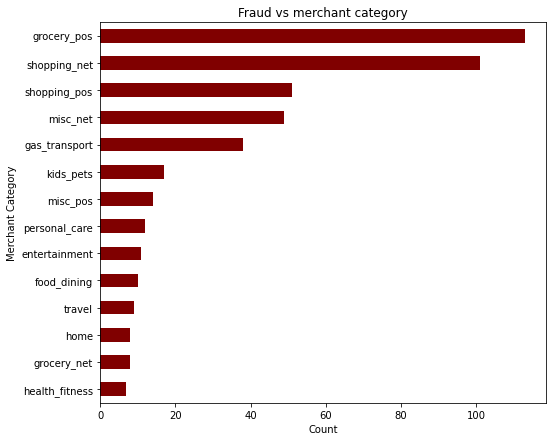

In [21]:
#Creating bar plot to identify merchant segments with highest fraud transactions
df_metric1= df1[['is_fraud','category']]
df_metricF=df_metric1[df_metric1['is_fraud']==True]

df_metricF.head()
xaxis1=df_metricF['category'].value_counts()

plt.xlabel('Count')
plt.ylabel('Merchant Category')
plt.title('Fraud vs merchant category')
plt.rcParams['figure.figsize'] = [8, 7]

xaxis1.sort_values(inplace=True)
xaxis1.plot(kind='barh',color='maroon') #Fraudulent transactions

### Metric 2: Amount lost by Fraud by Customer Segments Category

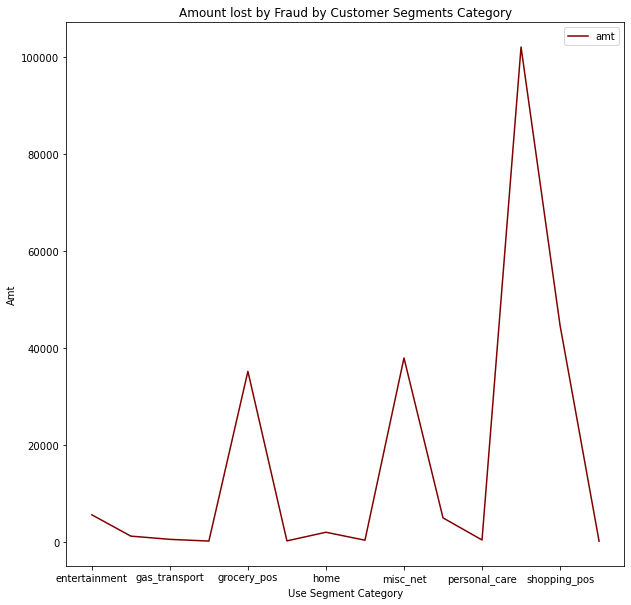

In [74]:
df_metricF=df1[df1['is_fraud']==True]
d2=df_metricF.groupby(by='category').sum('amt')[['amt']]

d2.plot(kind='line',color='maroon') #Fraudulent transactions
plt.xlabel('Use Segment Category')
plt.ylabel('Amt')
plt.title('Amount lost by Fraud by Customer Segments Category')
plt.rcParams['figure.figsize'] = [10, 10]


### Metric 3: State most affected by User Segment Fraud

In [99]:
df_metricstate=df1[df1['is_fraud']==True]
d2state=df_metricstate.groupby(by=['state','category']).sum('amt')[['amt']]
d2state1=d2state['amt'].groupby('state', group_keys=False)
d2state2 = d2state1.apply(lambda x: x.sort_values(ascending=False).head(1))
d2state2

state  category    
AK     shopping_net     1972.51
AL     shopping_pos     1699.54
AR     shopping_net     1971.64
CA     shopping_net     5284.93
FL     shopping_pos     4969.92
IA     grocery_pos       988.86
IL     shopping_pos     2484.34
IN     shopping_net     1927.39
KY     shopping_net     4942.03
ME     shopping_net     4954.19
MI     shopping_net     5019.25
MO     shopping_net     2942.96
NC     shopping_net     8299.31
ND     shopping_net     2915.90
NE     shopping_net     6543.81
NY     shopping_net     5807.93
OH     shopping_net    10497.22
OK     misc_pos         1541.46
PA     shopping_net    13762.77
SC     shopping_net     2879.61
SD     shopping_net     2027.13
TN     shopping_net     2965.96
TX     grocery_pos      1760.82
UT     shopping_net     2784.15
VA     shopping_net     6141.02
WI     shopping_net     2056.06
Name: amt, dtype: float64

### Only States affected by Fraud

In [101]:
df_metricstate=df1[df1['is_fraud']==True]
d2state=df_metricstate.groupby(by=['state']).sum('amt')[['amt']]
#d2state1=d2state['amt'].groupby('state', group_keys=False)
d2state2 = d2state.apply(lambda x: x.sort_values(ascending=False))
d2state2

,amt
state,
PA,28031.60
OH,23185.74
NY,18795.88
CA,15243.87
NC,15035.87
ME,14506.95
VA,14120.58
FL,12704.18
NE,12390.34


### Metric 4: Amount of fraud vs day of week

In [48]:
#Convert datetime to Month
df1['monthname'] = pd.to_datetime(df1['trans_date_trans_time']).dt.strftime('%B')
df1['monthname'].head()

0    January
1    January
2    January
3    January
4    January
Name: monthname, dtype: object

In [52]:
#Convert datetime to day of Week
df1['weekday']= pd.to_datetime(df1['trans_date_trans_time']).dt.day_name()
df1['weekday'].head()

0    Tuesday
1    Tuesday
2    Tuesday
3    Tuesday
4    Tuesday
Name: weekday, dtype: object

In [65]:
df_metricFraud=df1[df1['is_fraud']==True]
df_metric4 = df_metricFraud.groupby('weekday').sum('amt')[['amt']]
df_metric4.head()

,amt
weekday,
Friday,26422.59
Monday,33565.21
Saturday,26838.62
Sunday,46175.24
Thursday,19637.29


In [66]:
#Sort by weekday
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

{'Sunday': 0,
 'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6}

In [67]:
df_metric4['Day_id'] = df_metric4.index
df_metric4['Day_id'] = df_metric4['Day_id'].map(sorterIndex)
df_metric4.head()

,amt,Day_id
weekday,,
Friday,26422.59,5
Monday,33565.21,1
Saturday,26838.62,6
Sunday,46175.24,0
Thursday,19637.29,4


In [68]:
df_metric4.sort_values('Day_id', inplace=True)
df_metric4.head()

,amt,Day_id
weekday,,
Sunday,46175.24,0
Monday,33565.21,1
Tuesday,52285.52,2
Wednesday,29875.76,3
Thursday,19637.29,4


In [69]:
df_metric4.pop('Day_id')

weekday
Sunday       0
Monday       1
Tuesday      2
Wednesday    3
Thursday     4
Friday       5
Saturday     6
Name: Day_id, dtype: int64

In [70]:
df_metric4

,amt
weekday,
Sunday,46175.24
Monday,33565.21
Tuesday,52285.52
Wednesday,29875.76
Thursday,19637.29
Friday,26422.59
Saturday,26838.62


Text(0.5, 1.0, 'Fraud Transactions by WeekDay')

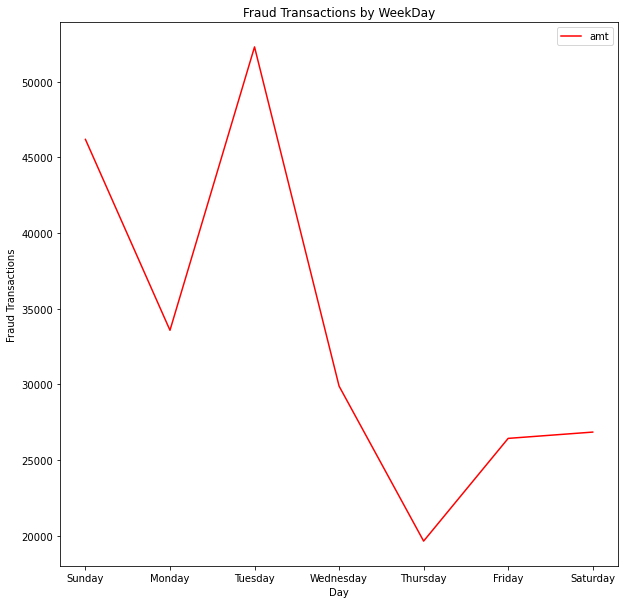

In [71]:
#Amount of fraud by day of the week

df_metric4.plot(kind='line',color='red')

plt.xlabel('Day')
plt.ylabel('Fraud Transactions')
plt.title('Fraud Transactions by WeekDay')

### Amount of fraud by month

In [102]:
dfmonth=pd.read_csv("subset2_fraudTrain.csv")
dfmonth.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,881438,12/22/2019 13:59,6.011200e+15,fraud_Bechtelar-Rippin,food_dining,2.45,Vincent,Ward,M,06730 Joshua Isle Suite 555,...,42.2665,-72.0821,4680,Field seismologist,4/3/1986,c6474afe2a8752fc94138bab8e59b3d1,1356184764,42.598317,-72.226576,0
1,294121,5/24/2019 21:17,6.595970e+15,"fraud_Bahringer, Bergnaum and Quitzon",home,48.82,Gina,Gomez,F,72030 Shelton Crossing Apt. 742,...,40.6774,-74.4968,2307,Science writer,9/11/1969,e8ef64ee2575ca76cb2bc0a18dbdeb2f,1337894276,41.441224,-74.659416,0
2,857777,12/16/2019 18:42,4.837000e+15,"fraud_Runte, Green and Emard",health_fitness,15.53,Susan,Hardy,F,516 Brown Parks,...,46.0062,-86.2555,6469,Trade mark attorney,4/12/1979,d49f365783fd1b63ebdc1d66dc5b8521,1355683354,46.620565,-87.053158,0
3,182561,4/5/2019 16:16,4.509920e+15,"fraud_Durgan, Gislason and Spencer",home,240.37,Monica,West,F,22084 Smith Roads Suite 776,...,43.2893,-97.1904,811,Neurosurgeon,3/28/1972,911f3de63f9f1d4141112919a393159b,1333642564,43.468624,-98.156441,0
4,224908,4/23/2019 16:38,6.502200e+15,"fraud_Runte, Green and Emard",health_fitness,77.30,Nathan,Byrd,M,155 Gregory Mount Suite 791,...,39.4584,-106.3851,277,Human resources officer,4/3/1985,ae1261b71d4473225722d693308bc762,1335199127,40.274821,-105.641308,0


In [103]:
#Convert datetime to Month
dfmonth['monthname'] = pd.to_datetime(dfmonth['trans_date_trans_time']).dt.strftime('%B')
dfmonth['monthname'].head()

0    December
1         May
2    December
3       April
4       April
Name: monthname, dtype: object

In [104]:
df_metricFraudMonth=dfmonth[dfmonth['is_fraud']==True]
df_metricFM = df_metricFraudMonth.groupby('monthname').sum('amt')[['amt']]
df_metricFM.head()

,amt
monthname,
April,11601.45
August,10413.76
December,12123.92
February,20512.60
January,14104.47


In [106]:
#Sort by weekday
sorter = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August','September'\
          ,'October','November','December']
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

{'January': 0,
 'February': 1,
 'March': 2,
 'April': 3,
 'May': 4,
 'June': 5,
 'July': 6,
 'August': 7,
 'September': 8,
 'October': 9,
 'November': 10,
 'December': 11}

In [107]:
df_metricFM['Month_id'] = df_metricFM.index
df_metricFM['Month_id'] = df_metricFM['Month_id'].map(sorterIndex)

,amt,Month_id
monthname,,
April,11601.45,3
August,10413.76,7
December,12123.92,11
February,20512.60,1
January,14104.47,0


In [108]:
df_metricFM.sort_values('Month_id',inplace=True)
df_metricFM.head()

,amt,Month_id
monthname,,
January,14104.47,0
February,20512.60,1
March,17922.85,2
April,11601.45,3
May,15662.34,4


In [109]:
df_metricFM.pop('Month_id')

monthname
January       0
February      1
March         2
April         3
May           4
June          5
July          6
August        7
September     8
October       9
November     10
December     11
Name: Month_id, dtype: int64

In [110]:
df_metricFM.head()

,amt
monthname,
January,14104.47
February,20512.60
March,17922.85
April,11601.45
May,15662.34


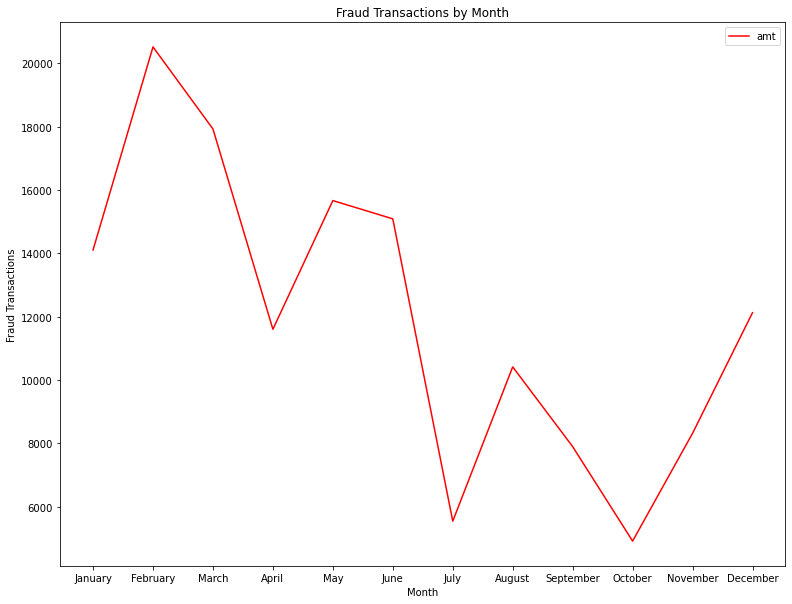

In [118]:
#Amount of fraud by month

df_metricFM.plot(kind='line',color='red')

plt.xlabel('Month')
plt.ylabel('Fraud Transactions')
plt.title('Fraud Transactions by Month')
plt.xticks(np.arange(12),sorter)
plt.rcParams['figure.figsize'] = [20, 10]